# 4 Bivariate analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # to suppress a numpy warning
%matplotlib inline

In [5]:
df = pd.read_csv('train.csv')

### Relationship between SalePrice and GrLivArea

When we suspect that the price of a house may depend on another variable, we can visually explore if this seems to be the case by plotting a scatter graph. The X-axis contains one variable, the Y-axis the other variable. Every point is a house from the DataFrame.

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

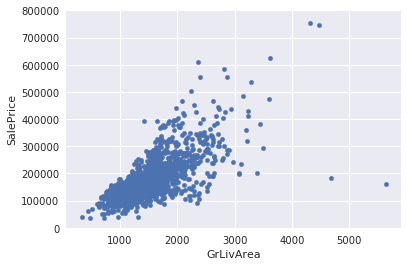

In [6]:
#scatter plot grlivarea/saleprice
data = pd.concat([df.SalePrice, df.GrLivArea], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

Visually, we can see that when we fit a straight line through the data, a line in an upward angle would clearly have the best fit in the sense that the distance between all points and the line would be minimized. The plot indicates a positive linear relationship, if we had to guess the saleprice of a mystery house knowing only the GrLivArea, one best guess would be to read the SalePrice from the fitted line for the given X-value.

### Scatter plot between SalePrice and TotalBsmtSF

We can repeat this process for other variables, for instance is the SalePrice dependent on the size of the basement (TotalBsmtSF appears to be Total Basement in Square Feet)?

In [ ]:
data = pd.concat([df.SalePrice, df.TotalBsmtSF], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

Again, visually it seems a line with an upward angle seems to be a better fit than with a downward angle.

### Associatedness with categorical features

In [ ]:
#box plot overallqual/saleprice
data = pd.concat([df.SalePrice, df.GarageType], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageType', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

It seems that houses with an attached or builtin garage are more expensive.

In [ ]:
import matplotlib.pyplot as plt
decades = df.YearBuilt.map(lambda x: x - x % 10)
data = pd.concat([df.SalePrice, decades], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

It seems that there is no strong correlation here. Some houses before 1900 are expensive, and otherwise more recently build houses tend to be slightly more expensive than older houses.

### Correlation heatmap

Computing these graphs for many pairs of numeric variables can be costly. To quickly explore which variables correlate, we can draw a heatmap over the correlation matrix.

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

The heatmap shows a darker color red/brown for highly correlated variables. So it seems SalePrice is correlated most strongly with OverallQual and GrLivArea.

Some variables are uncorrelated, yet both appear to have a positive contribution to SalePrice, e.g. FullBath and HalfBath. When we want to learn a prediction, sometimes a joined feature may be a better predictor (not always).

In [ ]:
df['Bath'] = df.FullBath + df.HalfBath

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

The combined Bath feature may have a slightly higher correlation, which we can check in the correlation matrix. However, when we check the correlation, it seems Bath is only marginally higher in correlation, and therefore it remains to be seen whether the additional use of Bath (next to FullBath and HalfBath) indeed improves SalePrice predictions. 

In [ ]:
corrmat['Bath']['SalePrice']

In [ ]:
corrmat['FullBath']['SalePrice']

To make it a bit easier, we can also extract the variables that are most highly correlated with SalePrice, and show a heatmap with the correlations. 

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Multiple scatter plots

To get more information on how these variables relate to one another, we can use pairplot form the Seaborn library.

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'Bath', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

#### Assignment: carry out a bivariate analysis between LotSize and SalePrice. Is there a potential relationship, and what else do you notice?

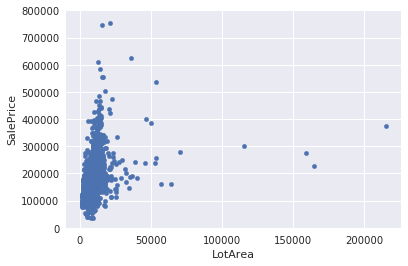

In [12]:
data = pd.concat([df.SalePrice, df.LotArea], axis=1)
data.plot.scatter(x='LotArea', y='SalePrice', ylim=(0,800000));

**Assignment answer:** As far as I know "LotSize" doesn't excist, only "LotArea"? Looking at the relationship between "LotArea" and "SalePrice" there is no potential relationship, because a bigger "LotArea" doesn't mean a higher "SalePrice".